C:\Users\Admin\AppData\Local\Temp\ipykernel_23316\1702040010.py:16: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26223 entries, 0 to 26222
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    26223 non-null  datetime64[ns]
 1   fc_pressure  26223 non-null  float64       
 2   ANOMALY      26223 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 614.7 KB
Rows  :  26223
Columns  :  3

Features  :
 ['timestamp', 'fc_pressure', 'ANOMALY']

Missing Values :
 timestamp      False
fc_pressure    False
ANOMALY        False
dtype: bool

 Unique Values :
 timestamp      25862
fc_pressure    23240
ANOMALY            2
dtype: int64


<Axes: >

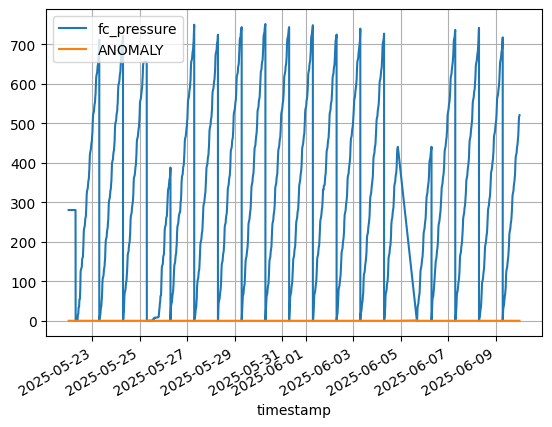

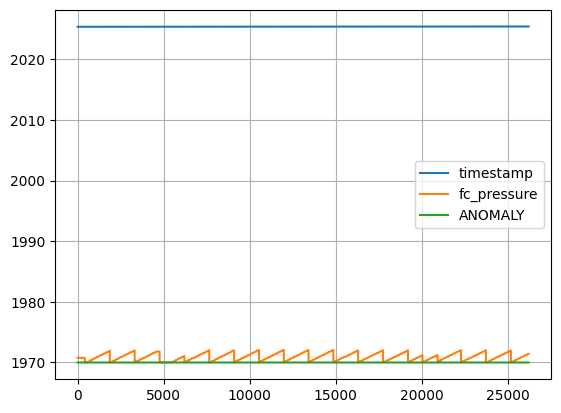

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# load Data
df = pd.read_csv("dataset/fox_creek_25-csv.csv")

df = df.rename(columns={
    "t_stamp": "timestamp",
    "Well Pads/Fox Creek 25SE/12-63 25-2-1/Heater Treater/Gas Meter/Today Flow" : "fc_pressure"
})

# convert timestamp
df["timestamp"] = pd.to_datetime(df["timestamp"])

df = df.drop('Unnamed: 3', axis=1)

df_non_index = df

df.info()


print("Rows  : ", df.shape[0])
print("Columns  : ", df.shape[1])
print("\nFeatures  :\n", df.columns.to_list())
print("\nMissing Values :\n", df.isnull().any())
print("\n Unique Values :\n", df.nunique())

# Set index for time-series ops
df = df.set_index("timestamp").sort_index()
df.head()
df.plot(grid=True)

import plotly.express as px

fig = px.line(df_non_index, x='timestamp', y='fc_pressure', title='Fox Creek Accumulator')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='5M', step='minute', stepmode='backward'),
            dict(count=1, label='1H', step='hour', stepmode='backward'),
            dict(count=1, label='1D', step='day', stepmode='backward'),
            dict(count=1, label='1M', step='month', stepmode='backward'),
            dict(step='all')
        ])
    )
)

fig.show()

df_non_index.describe()

df_non_index.loc['2025-05-22 06:59:00' : "2025-05-23 06:59:00"]
df_non_index.plot(grid=True)
